## OPT Trout processing, differential contrast
* MAG 0.5, C mount.
* embedded in 1.5%, 2ECI
* FL with blue torch excitation, Transmissino with WL LED, 590nm LP detections
* 400 steps and undersampling

In [1]:
from pathlib import Path
import gc

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import utils_opt as u

%load_ext autoreload
%autoreload 2

In [2]:
tr = np.load('data_output/0801_tr_lp590_400_recon.npy', allow_pickle=True)
fl = np.load('data_output/0801_fl_lp590_400_recon.npy', allow_pickle=True)

In [3]:
np.amax(tr), np.amin(tr), np.amax(fl), np.amin(fl)

(np.int16(4096), np.int16(0), np.int16(4096), np.int16(0))

In [4]:
lineidx = [200, 680, 1000]
tr_slices = tr[lineidx].copy()
fl_slices = fl[lineidx].copy()
tr_slices.shape

(3, 1536, 1536)

In [5]:
tr.shape == fl.shape
diff = tr - fl[:-1, :, :]
diff_slices = tr_slices - fl_slices
np.amax(diff), np.amin(diff), diff_slices.shape

(np.int16(4096), np.int16(-4076), (3, 1536, 1536))

### Paper figure 3C

In [6]:
# max projection alone
maxproj= np.max(diff, axis=2)
meanproj= np.mean(diff, axis=2)

# normalization step
data = diff_slices.copy()

del tr
del fl

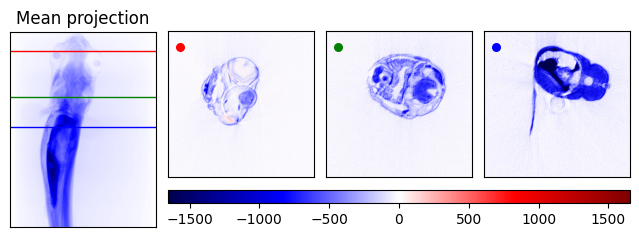

1816

In [7]:
# saturation_factors
sf = 2
sf2 = 1
edge_px = 240
fig = plt.figure(figsize=(8, 4))
meanproj_limit = max(abs(np.amin(meanproj)), abs(np.amax(meanproj))) / sf2
abs_cbar_limit = max(abs(np.amin(diff_slices)), abs(np.amax(diff_slices))) / sf

gs = gridspec.GridSpec(
    2, 4,
    height_ratios=[1.0, 0.032],
    width_ratios=[1.3, 1.3, 1.3, 1.3],
    hspace=-0.5
)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])
cax = fig.add_subplot(gs[1, 1:])


ax0.imshow(meanproj, cmap=plt.cm.seismic,
           vmin=-meanproj_limit / sf2, vmax=meanproj_limit / sf2)
ax0.axhline(lineidx[0], color='r', lw=1, label='_nolegend_')
ax0.axhline(lineidx[1], color='g', lw=1, label='_nolegend_')
ax0.axhline(lineidx[2], color='b', lw=1, label='_nolegend_')
ax0.set_title('Mean projection')
ax0.set_yticks([]), ax0.set_xticks([])


ax1.imshow(data[0][edge_px:-edge_px, edge_px:-edge_px], cmap=plt.cm.seismic,
           vmin=-abs_cbar_limit, vmax=abs_cbar_limit)
ax1.scatter(90, 110, color="red", s=30)
ax1.set_yticks([]), ax1.set_xticks([])

ax2.imshow(data[1][edge_px:-edge_px, edge_px:-edge_px], cmap=plt.cm.seismic,
           vmin=-abs_cbar_limit, vmax=abs_cbar_limit)
ax2.scatter(90, 110, color="green", s=30)
ax2.set_yticks([]), ax2.set_xticks([])

im = ax3.imshow(data[2][edge_px:-edge_px, edge_px:-edge_px], cmap=plt.cm.seismic,
                vmin=-abs_cbar_limit, vmax=abs_cbar_limit)
ax3.scatter(90, 110, color="blue", s=30)
ax3.set_yticks([]), ax3.set_xticks([])
cbar = fig.colorbar(
    im,
    cax=cax,
    orientation="horizontal",
)

fig.subplots_adjust(
    hspace=0.02,
    wspace=0.08
)
u.move_up(ax1, 0.063)
u.move_up(ax2, 0.063)
u.move_up(ax3, 0.063)
u.move_up(cax, 0.09)

plt.savefig('fig_output/fig3c_diff.png', dpi=180)
plt.show()
gc.collect()

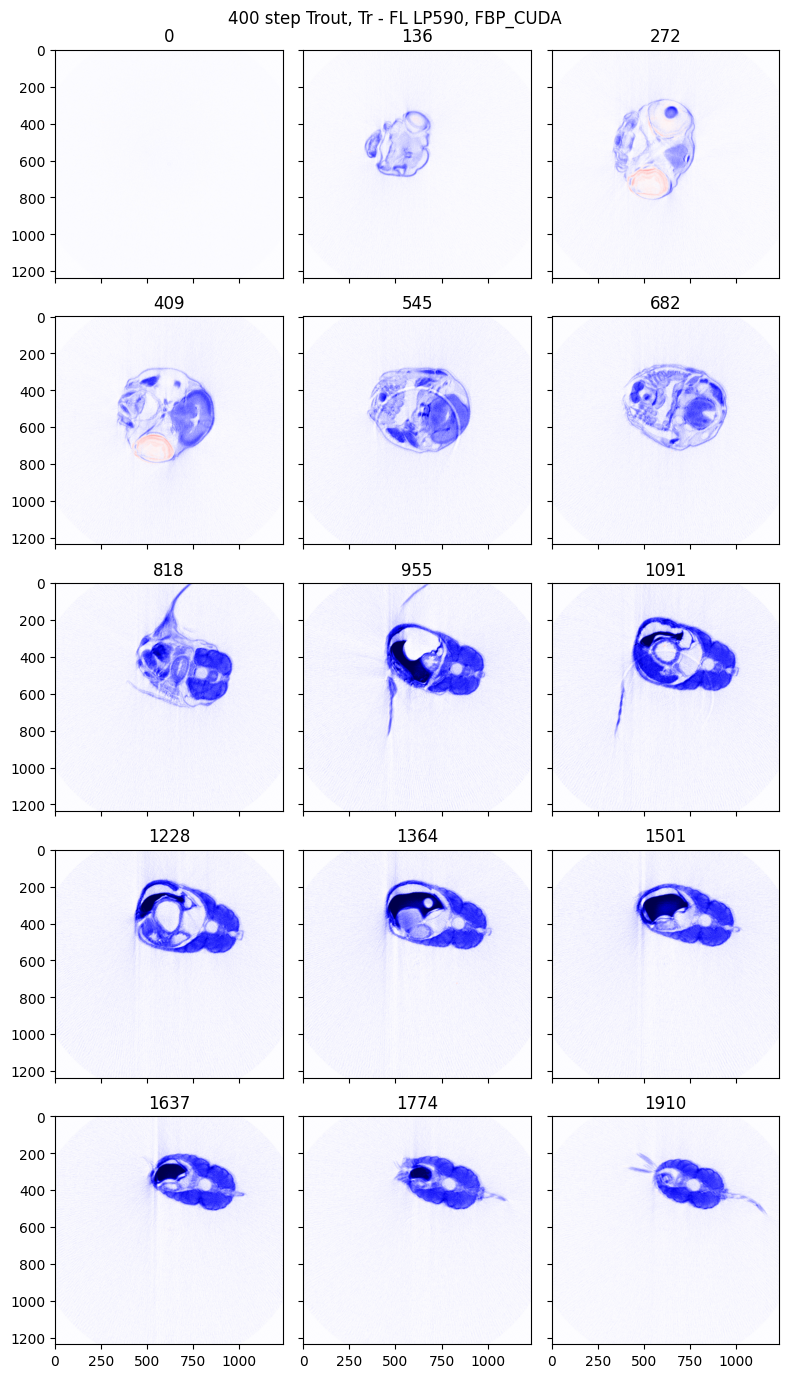

In [11]:
height = diff.shape[0]
cmax = np.amax(diff)
cmin = np.amin(diff)
edge_px = 150
sf = 2

fig, ax = plt.subplots(5, 3, figsize=(8, 14), sharex=True, sharey=True)
for i in range(len(diff)):
    try:
        ax[i//3, i%3].imshow(diff[int(height/15*i), edge_px:-edge_px, edge_px:-edge_px],
                            #  cmap=plt.cm.Greys_r,
                             cmap=plt.cm.seismic,
                             vmin=cmin / sf, vmax=cmax / sf)
        # for the case of stride in rows and plotting everything
        # ax[i//3, i%3].imshow(full_recon[i], cmap=plt.cm.Greys_r)
        ax[i//3, i%3].set_title(int(height/15*i))
    except:
        pass
plt.suptitle('400 step Trout, Tr - FL LP590, FBP_CUDA')
plt.tight_layout()
plt.savefig('fig_output/0801_trfl_diff.png', dpi=180)
plt.show()